# Ponder Demo - Citibike Mobility Analysis

This notebook shows you how you can use Ponder to unleash your pandas code directly in your database! For the first time ever, Ponder gives you a native pandas interface to your data warehouses.

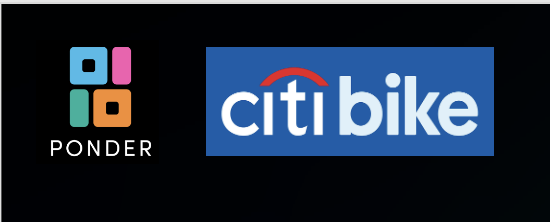

# Demo Overview

Pandas is easy to use, flexible, and concise. Relational databases are scalable and reliable, but force you to use SQL. This demo shows you how Ponder allows your to combine the best of both worlds. We show that with ponder you reduce the lines of code required relative to SQL AND you can do operations that aren't even relational in nature!

### [Initial Setup + Configuration](#setup)


### [ How it Works](#how-it-works)


### [The Use Case](#key-questions)
We want to understand mobility patterns in New York City using bikeshare data. Specifically, we want to answer questions like:

* [What time fram does the data set contain?](#first-question)
* [Which age group uses Citi Bike most often and the trend?](#second-question)
* [Which gender uses Citi Bike most often and the trend?](#third-question)
* [Which day of the week is Citi Bike most utilized?](#fourth-question)
* [What is the average trip duration per day of the week?](#fifth-question)
* [What is the total number of trips per month for year 2015?](#sixth-question)

    
To answer these questions with SQL it takes about 130 lines of code, as seen in this [Kaggle notebook](https://www.kaggle.com/code/cjinquan/citibike-analysis-sql/notebook) and we're using the public data available [here](https://ride.citibikenyc.com/system-data).

## <h2 align="center" >With Pandas, we can answer these same questions with +10X less code.</h2>

# <h1 align="center">🔥8 lines of pandas vs. ~130 lines with the SQL🔥</h1>

&nbsp;

<a class="anchor" id="setup"></a>
# 🛠️Initial Setup + Configuration

###  Configure Database Connection

This example uses your Snowflake database as the backend engine. If you don't have Snowflake and need support for other databases, please reach out to support@ponder.io

In [ ]:
snowflake_con = ponder.snowflake.connect(
		user='YOUR_USERNAME', #your username that you entered during sign up
    password='YOUR_PASSWORD', #password that you entered during sign up
    account="YOUR_ACCOUNT", #You can find this under “Admin” > “Accounts” > "Locator" field (You can also find your account in the URL: https://app.snowflake.com/us-west-2/<account-name>/organization
    role="ACCOUNTADMIN", # your access control level. By default this is “ACCOUNTADMIN”.
    database="YOUR_DB", # database = “SNOWFLAKE_SAMPLE_DATA”
    schema="PUBLIC",   # schema= “PUBLIC”,
    warehouse="COMPUTE_WH" # warehouse= “COMPUTE_WH”

)

### Initialize Ponder DB Connection

This service requires the Ponder kernel, which you're using in Ponder Cloud. If you're interested in deploying this inside of your own cloud account or want terminal, cli, or other non-notebook interface, please reach out to support@ponder.io.

In [ ]:
# Initialize the Snowflake connection
ponder.snowflake.init(snowflake_con, timeout=1200)

### Import Requirements + Select Data Source

Now that we've initialized the Ponder service, we can do our analysis using pandas syntax as if we were in any local enviornment, except Ponder's magic will be pushing all of the computation to your Snowflake instance under the hood. 

In [19]:
#import ponder as pd
import pandas as pd
df = pd.read_csv("citibike_trial.csv")

/var/folders/y1/x4wkz05j5db6clj3_6m5yb500000gn/T/ipykernel_66584/2821973326.py:3: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("citibike_trial.csv")


&nbsp;

<a class="anchor" id="how-it-works"></a>
# How it Works 

ICYMI - As you go through the rest of this notebook, it may seem like any other pandas tutorial notebook, and that is the magic of Ponder! 


The Ponder cloud instance you're running on right now has Megabytes of memory, but you can use this notebook to analyze Terabytes of data.


As you run each code block, none of the work is being done in the notebook's enviornment. Ponder moves your pandas code into your database so that it does all of the heavy lifting. The data that comes back to the notebook enviornment are the KB's of data required for printing.

&nbsp;

<a class="anchor" id="key-questions"></a>
# 6 Mobility Trend Questions Answered

Preview the data before analysis

In [20]:
df.head()

,tripduration,starttime,stoptime,bikeid,usertype,gender,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,birth_year
0,732.0,2019-11-06 15:11:28.721,2019-11-06 15:23:41.2970,25785.0,Subscriber,1.0,E 47 St & 1 Ave,516.00,E 43 St & 5 Ave,3680.0,40.752069,-73.967844,40.754121,-73.980252,1994.0
1,313.0,2019-02-21 17:17:19.919,2019-02-21 17:22:33.9070,26506.0,Subscriber,2.0,E 41 St & Madison Ave,3235.00,Broadway & W 32 St,498.0,40.752165,-73.979922,40.748549,-73.988084,1960.0
2,NaN,2021-12-04 11:33:16.000,2021-12-04 11:35:15,NaN,NaN,NaN,E 11 St & Avenue B,5659.11,E 10 St & Avenue A,5659.05,40.727464,-73.979504,40.727408,-73.981420,NaN
3,754.0,2015-07-29 06:58:54.000,7/29/2015 07:11:29,23061.0,Subscriber,1.0,W 15 St & 7 Ave,482.00,E 47 St & Park Ave,359.0,40.739355,-73.999318,40.755103,-73.974987,1981.0
4,353.0,2015-07-29 17:39:44.000,7/29/2015 17:45:37,14927.0,Subscriber,1.0,Lafayette St & E 8 St,293.00,St Marks Pl & 2 Ave,236.0,40.730287,-73.990765,40.728419,-73.987140,1954.0


&nbsp;

<a class="anchor" id="first-question"></a>
# ❓Q1: What time frame does the data set contain ❓

### pandas  - 1 line of code

Calcualte the min and max values of trip starts.

In [2]:
print(f'Date Range: min:{df.starttime.min()}, max:{df.starttime.max()}')

Date Range: min:12/1/2014 06:44:57, max:7/9/2015 22:59:47


## <h2 align="center"> 💡 15 lines of code required using SQL Approach! See [here](https://www.kaggle.com/code/cjinquan/citibike-analysis-sql?scriptVersionId=78471031&cellId=4) </h2>

&nbsp;

<a class="anchor" id="second-question"></a>
# ❓Q2: Which age group uses CitiBike most often & what is the trend ❓

### pandas - 3 lines of code

Convert column to datettime format, define mappings of birth years to age groups, replace birth years with age groups, calcualte how many trips per age group per year

In [6]:
df['starttime'] = pd.to_datetime(df.starttime)
gens = {range(0,1940):'other', range(1940,1960):'boomer',range(1960,1980):'genx',range(1980,1995):'geny',range(1995,2021):'genz'}
df.replace({'birth_year':gens}).groupby([df.starttime.dt.year,'birth_year']).size()

starttime  birth_year
2014       boomer          173
           genx            704
           geny            619
           genz             22
           other             2
2015       boomer          334
           genx           1560
           geny           1761
           genz             32
           other             6
2016       boomer          535
           genx           2294
           geny           2730
           genz             96
           other             5
2017       boomer         1185
           genx           5905
           geny           8449
           genz            622
           other            26
2018       boomer          899
           genx           5386
           geny           6176
           genz            503
           other            25
2019       boomer         1313
           genx           7574
           geny          10206
           genz           1493
           other            36
2020       boomer          399
           genx  

## <h2 align="center"> 💡 23 lines of code required using SQL approach! See [here](https://www.kaggle.com/code/cjinquan/citibike-analysis-sql?scriptVersionId=78471031&cellId=6) </h2>

&nbsp;

<a class="anchor" id="third-question"></a>
# ❓Q3: Which gender uses Citi Bike most often and what's the trend ❓

### pandas  - 1 line of code

Group by gender and year, count how many trip per gender per year, and then normalize to a % 

In [7]:
df.groupby([df.starttime.dt.year,'gender']).size()/df.groupby([df.starttime.dt.year]).size()*100

starttime  gender
2014       0.0        3.553299
           1.0       77.601523
           2.0       18.845178
2015       0.0       16.155419
           1.0       63.735515
           2.0       20.109066
2016       0.0       10.220951
           1.0       69.527897
           2.0       20.251152
2017       0.0        9.792169
           1.0       67.038261
           2.0       23.169570
2018       0.0        8.129956
           1.0       68.465625
           2.0       23.404419
2019       0.0        5.862671
           1.0       71.433421
           2.0       22.703908
2020       0.0       11.068154
           1.0       59.317353
           2.0       29.614492
dtype: float64

## <h2 align="center"> 💡 23 lines of code required with SQL + standard datbase connection! See [here](https://www.kaggle.com/code/cjinquan/citibike-analysis-sql?scriptVersionId=78471031&cellId=11) </h2>

&nbsp;

<a class="anchor" id="fourth-question"></a>
#  ❓Q4: Which day of the week is the most popular ❓

### pandas - 1 line

Group records by day of week and count how many trips there are

In [8]:
df.groupby(df.starttime.dt.day_of_week).size()

starttime
0    16469
1    17218
2    17892
3    18503
4    18234
5    16599
6    13951
dtype: int64

## <h2 align="center"> 💡 20 lines of code required with SQL approach! See [here](https://www.kaggle.com/code/cjinquan/citibike-analysis-sql?scriptVersionId=78471031&cellId=16) </h2>

&nbsp;

<a class="anchor" id="fifth-question"></a>
# ❓Q5: What is the average trip duration per day of the week ❓

### pandas - 1 line

Group records by day of week then calculate the average duration of trips for each day of the week

In [9]:
df.groupby(df.starttime.dt.day_of_week).tripduration.mean()

starttime
0     942.398981
1     831.927053
2     893.338120
3     947.913214
4     847.114403
5    1493.136168
6    1079.093356
Name: tripduration, dtype: float64

## <h2 align="center">  💡20 lines of code required with SQL approach! See [here]() </h2>

&nbsp;

<a class="anchor" id="sixth-question"></a>
#  ❓Q6: What is the total number of trips per month for year 2017 ❓

### pandas - 1 line of code

Filter to 2017 records, group by month, then count trips per month

In [16]:
df[df.starttime.dt.year==2017].groupby(df.starttime.dt.month).starttime.count()

starttime
6     6831
10    7418
12    3602
Name: starttime, dtype: int64

## <h2 align="center">💡24 lines of code required with SQL approach! See [here]()</h2>

&nbsp;

## So in total...

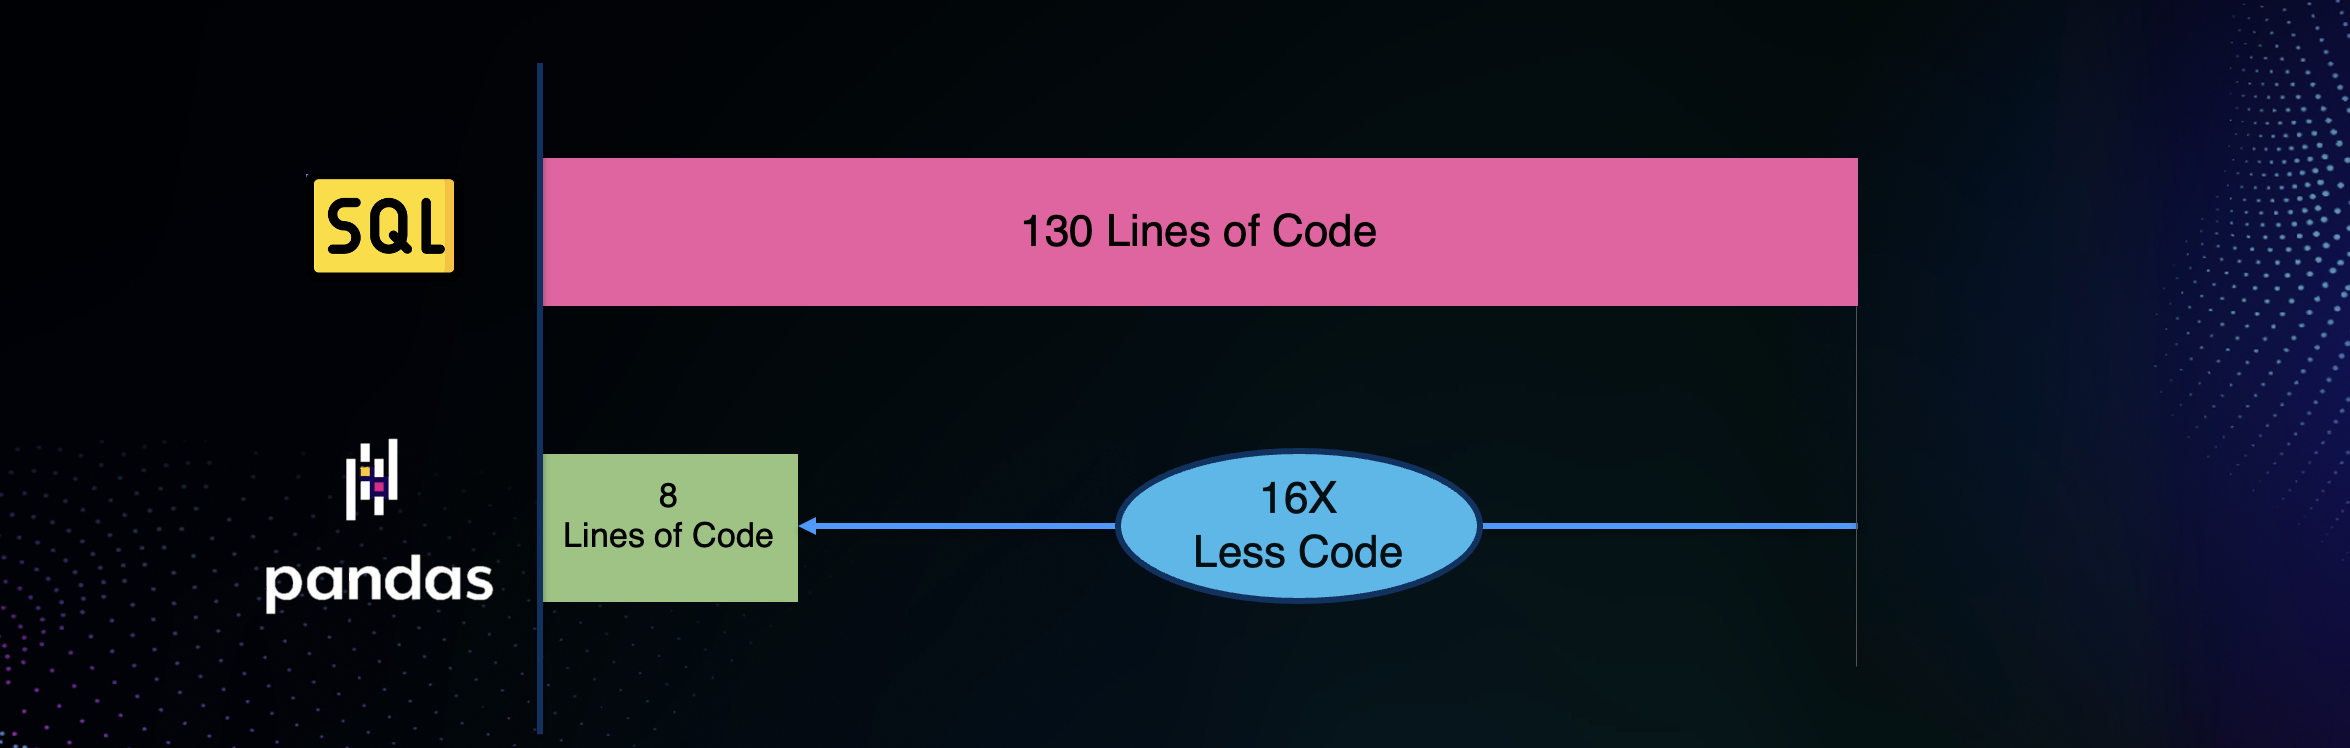

&nbsp;

# But how you do things like the following in SQL ⁉️

### Drop rows with missing values, sort by trip duration, get the top 10 longest trips

A key characteristic of dataframes is that they are ordered, that order is preserved across operations, and we can use indexing to select subsets of data.

In [21]:
df.dropna(axis=0).sort_values(by='tripduration',ascending=False)[0:10]

,tripduration,starttime,stoptime,bikeid,usertype,gender,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,birth_year
41666,2970906.0,2018-03-31 15:35:31.861,2018-05-05 00:50:38.2830,25822.0,Customer,0.0,N 6 St & Bedford Ave,3093.0,E 118 St & Madison Ave,3501.0,40.717452,-73.958509,40.801487,-73.944251,1969.0
59744,1495018.0,2017-06-05 17:20:40.000,2017-06-23 00:37:38,16416.0,Customer,2.0,Broadway & Whipple St,3067.0,NYCBS Depot - GOW,3432.0,40.701666,-73.943730,40.669060,-73.994637,1963.0
107536,1466991.0,2020-10-08 15:30:27.840,2020-10-25 15:00:18.9810,14827.0,Customer,0.0,Adam Clayton Powell Blvd & W 126 St,3629.0,Vernon Blvd & 30 Rd,3610.0,40.809495,-73.947765,40.770845,-73.934171,1969.0
60574,730027.0,2020-10-03 13:48:04.525,2020-10-12 00:35:11.6540,47846.0,Subscriber,2.0,Sullivan Pl & Franklin Ave,4117.0,Jay St & York St,3674.0,40.664080,-73.960251,40.701403,-73.986727,2001.0
101389,531310.0,2019-11-20 16:49:04.553,2019-11-26 20:24:14.6060,28088.0,Subscriber,2.0,Mott St & Prince St,251.0,Madison Ave & E 120 St,3503.0,40.723180,-73.994800,40.802950,-73.942954,1959.0
97703,432898.0,2017-10-07 12:24:59.000,2017-10-12 12:39:58,19975.0,Subscriber,1.0,Columbia St & Lorraine St,3333.0,Expansion Warehouse 333 Johnson Ave,3636.0,40.674706,-74.007557,40.707731,-73.934523,2000.0
115451,410783.0,2017-10-14 21:59:27.000,2017-10-19 16:05:50,28269.0,Subscriber,1.0,W 37 St & 5 Ave,485.0,E 106 St & 1 Ave,3391.0,40.750380,-73.983390,40.789253,-73.939562,1997.0
110707,368395.0,2019-11-12 18:29:13.777,2019-11-17 00:49:08.9500,14607.0,Subscriber,1.0,Lafayette St & Jersey St,250.0,4 Ave & 9 St,3403.0,40.724561,-73.995653,40.670513,-73.988766,2003.0
49814,259466.0,2017-06-25 13:06:06.000,2017-06-28 13:10:33,20905.0,Subscriber,1.0,Halsey St & Tompkins Ave,3047.0,Nassau St & Navy St,144.0,40.682369,-73.944118,40.698399,-73.980689,1984.0
70146,219238.0,2018-04-13 19:26:16.432,2018-04-16 08:20:14.7820,15183.0,Customer,1.0,Myrtle Ave & Marcy Ave,3062.0,Willoughby St & Fleet St,239.0,40.695398,-73.949549,40.691966,-73.981302,1988.0


### Create dummies for feature engineering/modeling

Gender values in our data set are 0,1,2 representing male, female, and uknown. If as part of our feature engineering we want to do one-hot encoding of each gender category in order to do some predictive modeling we would use pandas' get_dummies to do so.

In [18]:
pd.get_dummies(df['gender'])

,0.0,1.0,2.0
0,0,1,0
1,0,0,1
2,0,0,0
3,0,1,0
4,0,1,0
...,...,...,...
118861,0,1,0
118862,0,0,0
118863,0,1,0
118864,0,0,1


### Modify the index and use the index for subsequent operations

As with a true dataframe system, we can elevate data from our dataframe (the Bike ID's) to be metadata, reset indexes, and use those indexes as desired.

In [22]:
df.bikeid = df.bikeid.astype(int,errors='ignore')
df.set_index("bikeid").loc[20167]

,tripduration,starttime,stoptime,usertype,gender,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,birth_year
bikeid,,,,,,,,,,,,,,
20167.0,1032.0,2018-04-01 18:30:00.398,2018-04-01 18:47:12.8910,Customer,0.0,W 44 St & 5 Ave,484.0,W 33 St & 7 Ave,492.0,40.755003,-73.980144,40.750200,-73.990931,1969.0
20167.0,903.0,2019-02-15 08:48:54.143,2019-02-15 09:03:57.4950,Subscriber,2.0,E 47 St & 1 Ave,516.0,E 74 St & 1 Ave,3372.0,40.752069,-73.967844,40.768974,-73.954823,1956.0
20167.0,643.0,2019-02-14 13:26:53.035,2019-02-14 13:37:36.5460,Subscriber,1.0,11 Ave & W 59 St,530.0,11 Ave & W 59 St,530.0,40.771497,-73.990460,40.771497,-73.990460,1982.0


&nbsp;

##  💡 Ponder gives you a high fidelity pandas experience for your databases 💡

* We answered 6 Mobility questions to demonstrate the concise and flexible nature of pandas vs. SQL


* Demonstrated a standard dataframe operations that are extremeley challenging to do manually with SQL and can't be done with other dataframe-like systems








&nbsp;

### For feedback, support, or to request additional features, email us at [support@ponder.io](support@ponder.io)